**Bank-Marketing**

Creating a logistic regression model using python on a bank data, to find out if the customer have subscribed to a specific plan or not.

Problem Statement:

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In this project, you need to build a model for deciding whether a campaign will be successful in getting a client to sign up for the term deposits.

Dataset

The dataset is in the form of a csv file and the link to download is given below: https://cdn.upgrad.com/UpGrad/temp/e4993de3-06a6-4c7d-b12f-774ce36b592e/bank.csv

**Logistic Regression Assignment**

Total Marks: 100

Instructions:

This assignment is designed to test your
ability to build and evaluate a logistic regression model using the given dataset.
Follow the steps provided and answer each question with proper analysis and visualizations.
Ensure that you add comments explaining each step in your code.
Submit your completed Jupyter Notebook file.
Submission Guidelines:
Ensure your notebook is well-structured and properly commented.
Submit the completed Jupyter Notebook (.ipynb) file.

**Grading Criteria:**

Data Loading & Inspection - 10 marks

Data Cleaning - 10 marks

Descriptive Statistics - 10 marks

Univariate Analysis - 10 marks

Bivariate Analysis - 10 marks

Multivariate Analysis - 10 marks

Heatmap & Correlation Analysis - 10 marks

Building Logistic Regression Model - 15 marks

Model Evaluation & Interpretation - 10 marks

Final Conclusion - 5 marks

**Questions:**

1. Load the Data (5 marks)

*   Load the dataset into a Pandas DataFrame.
*   Display the first five rows to understand the structure.
*   Check for missing values.


In [24]:
#Loading the Pakages used:

import pandas as pd    #for data manuplation and analysis
import numpy as np     #for numerical operations
import matplotlib.pyplot as plt  #for basic plotting
import seaborn as sns  #for advanced visualizations(heatmap, boxplot)
#import scikitlearn as sklearn
from sklearn.model_selection import train_test_split   #to splot the data set
from sklearn.linear_model import LogisticRegression  #Logistic Regression model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  #Evaluation metrics
from scipy import stats   #for z-score based outliers
from google.colab import drive
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [43]:
#data_path ="/content/bank.csv"
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Data sets/bank_details.csv"

# Load directly from the URL
#url = "https://cdn.upgrad.com/UpGrad/temp/e4993de3-06a6-4c7d-b12f-774ce36b592e/bank.csv"
#df = pd.read_csv(data_path, sep=';')  # Note the semicolon separator

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
#Load the dataset
df=pd.read_csv(data_path)
#Display the first five rows to understand the structure.
df.head(20)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [48]:
#check for missing values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [49]:
df.to_csv("bank.csv")

In [50]:
df.shape

(4521, 17)

In [51]:
df[~df.map(np.isreal).all(1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


**2. Data Inspection (5 marks)**

Display the data types of all columns.

Check for duplicate values and handle them if necessary.

Identify the target variable.

In [53]:
#check datatypes
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [54]:
#check for duplicates rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)



Number of duplicate rows: 0


In [55]:
#no need to handel the duplicates cuz the number is zero

#if there are any duplicates use the below code to drop them
df = df.drop_duplicates()


In [56]:
#identify the target variables

print("Target variable:", "y (Subscribed to term deposit: yes or no)")
df['y'].value_counts()

Target variable: y (Subscribed to term deposit: yes or no)


,count
y,
no,4000
yes,521


3. Data Cleaning (10 marks)

Handle missing values appropriately.

Check for outliers using box plots.

Perform any necessary transformations.

In [57]:
#checking foe missing values again
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [81]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.00
balance,4521.0,1351.824127,2427.842140,-3313.0,69.0,444.0,1480.0,14174.28
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.00
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.00
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.00
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.00
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.00
marital_LabelEncoder,4521.0,1.147755,0.599650,0.0,1.0,1.0,2.0,2.00
education_LabelEncoder,4521.0,1.231365,0.748744,0.0,1.0,1.0,2.0,3.00
default_LabelEncoder,4521.0,0.016810,0.128575,0.0,0.0,0.0,0.0,1.00


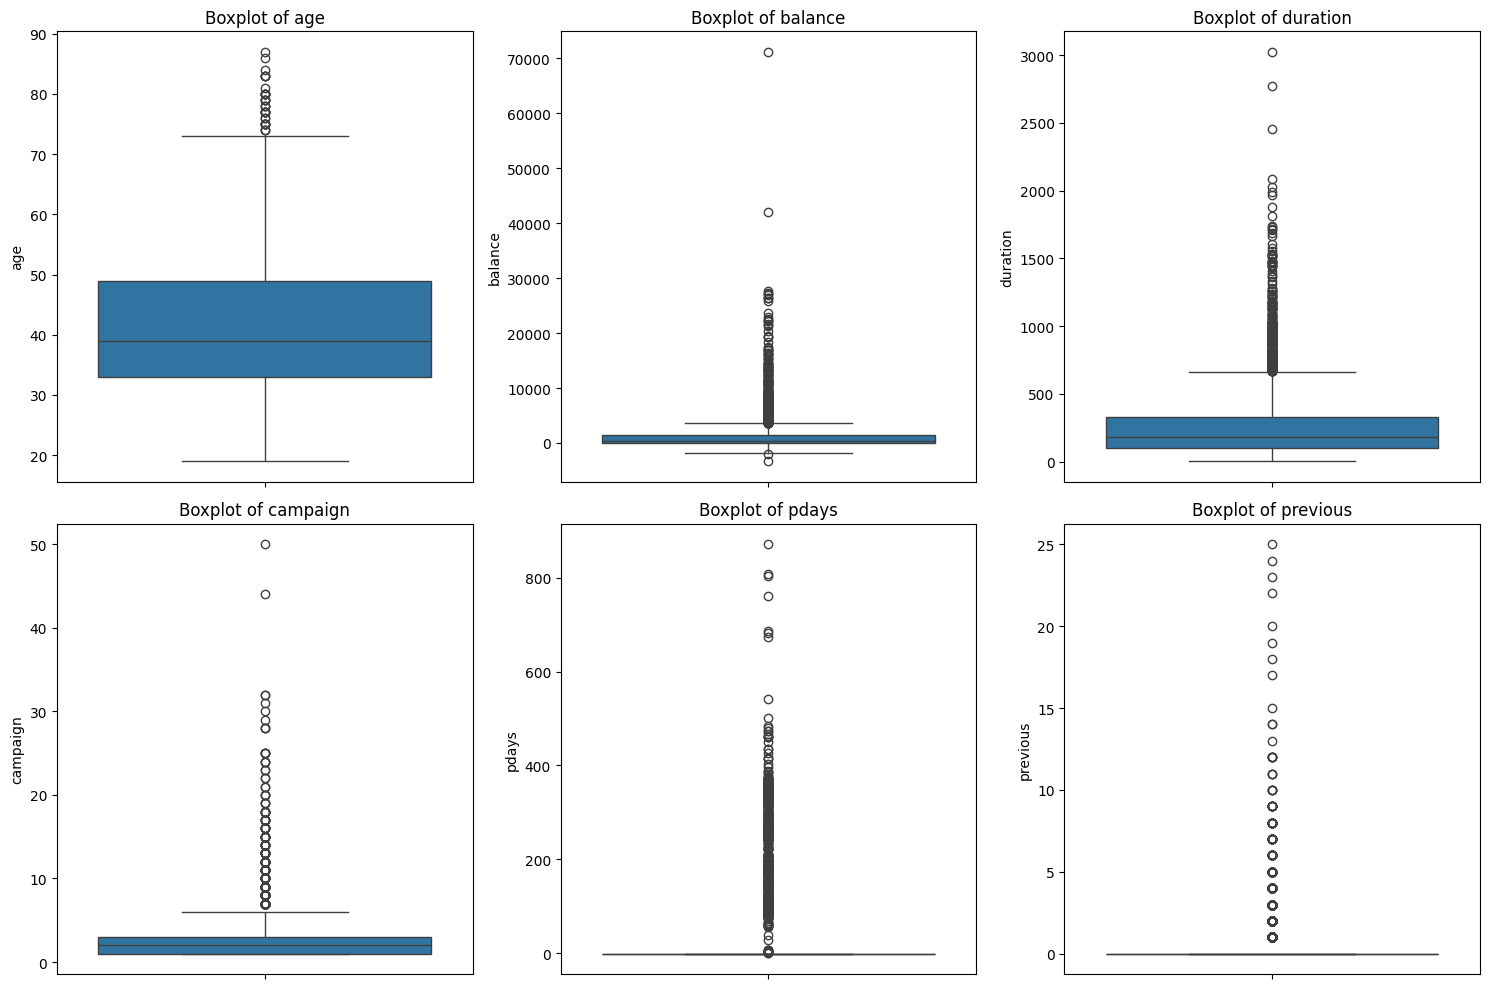

In [71]:
# List of numerical columns
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Plot boxplots for each numeric column
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [73]:
#optional

# Cap 'balance' values above 99th percentile
upper_limit = df['balance'].quantile(0.99)
df['balance'] = df['balance'].apply(lambda x: upper_limit if x > upper_limit else x)


4. Descriptive Statistics (10 marks)

Generate summary statistics for numerical variables.

Provide insights on the distribution of key variables.

In [74]:
#descriptive stastss
df.describe()

,age,balance,day,duration,campaign,pdays,previous,marital_LabelEncoder,education_LabelEncoder,default_LabelEncoder,housing_LabelEncoder,loan_LabelEncoder,contact_LabelEncoder,month_LabelEncoder,poutcome_LabelEncoder,y_LabelEncoder,job_LabelEncoder
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1351.824127,15.915284,263.961292,2.793630,39.766645,0.542579,1.147755,1.231365,0.016810,0.566025,0.152842,0.652289,5.540146,2.559168,0.115240,4.411192
std,10.576211,2427.842140,8.247667,259.856633,3.109807,100.121124,1.693562,0.599650,0.748744,0.128575,0.495676,0.359875,0.901498,3.002763,0.992051,0.319347,3.255716
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000,4.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000,7.000000
max,87.000000,14174.280000,31.000000,3025.000000,50.000000,871.000000,25.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000,11.000000


In [75]:
# Summary of categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(normalize=True) * 100)



Value counts for job:
job
management       21.433311
blue-collar      20.924574
technician       16.987392
admin.           10.572882
services          9.223623
retired           5.087370
self-employed     4.047777
entrepreneur      3.715992
unemployed        2.831232
housemaid         2.477328
student           1.857996
unknown           0.840522
Name: proportion, dtype: float64

Value counts for marital:
marital
married     61.866844
single      26.454324
divorced    11.678832
Name: proportion, dtype: float64

Value counts for education:
education
secondary    51.006415
tertiary     29.860650
primary      14.996682
unknown       4.136253
Name: proportion, dtype: float64

Value counts for default:
default
no     98.318956
yes     1.681044
Name: proportion, dtype: float64

Value counts for housing:
housing
yes    56.602522
no     43.397478
Name: proportion, dtype: float64

Value counts for loan:
loan
no     84.715771
yes    15.284229
Name: proportion, dtype: float64

Value counts for 

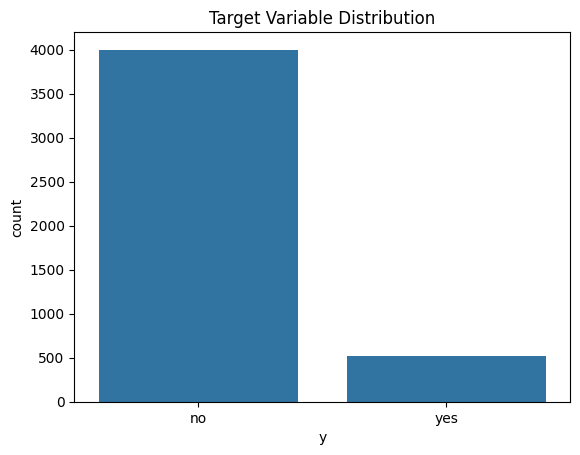

In [77]:

# Countplot of target
sns.countplot(data=df, x='y')
plt.title('Target Variable Distribution')
plt.show()


5. Univariate Analysis (10 marks)

Perform and visualize univariate analysis on each column separately.

Use histograms, boxplots, and value counts where applicable.

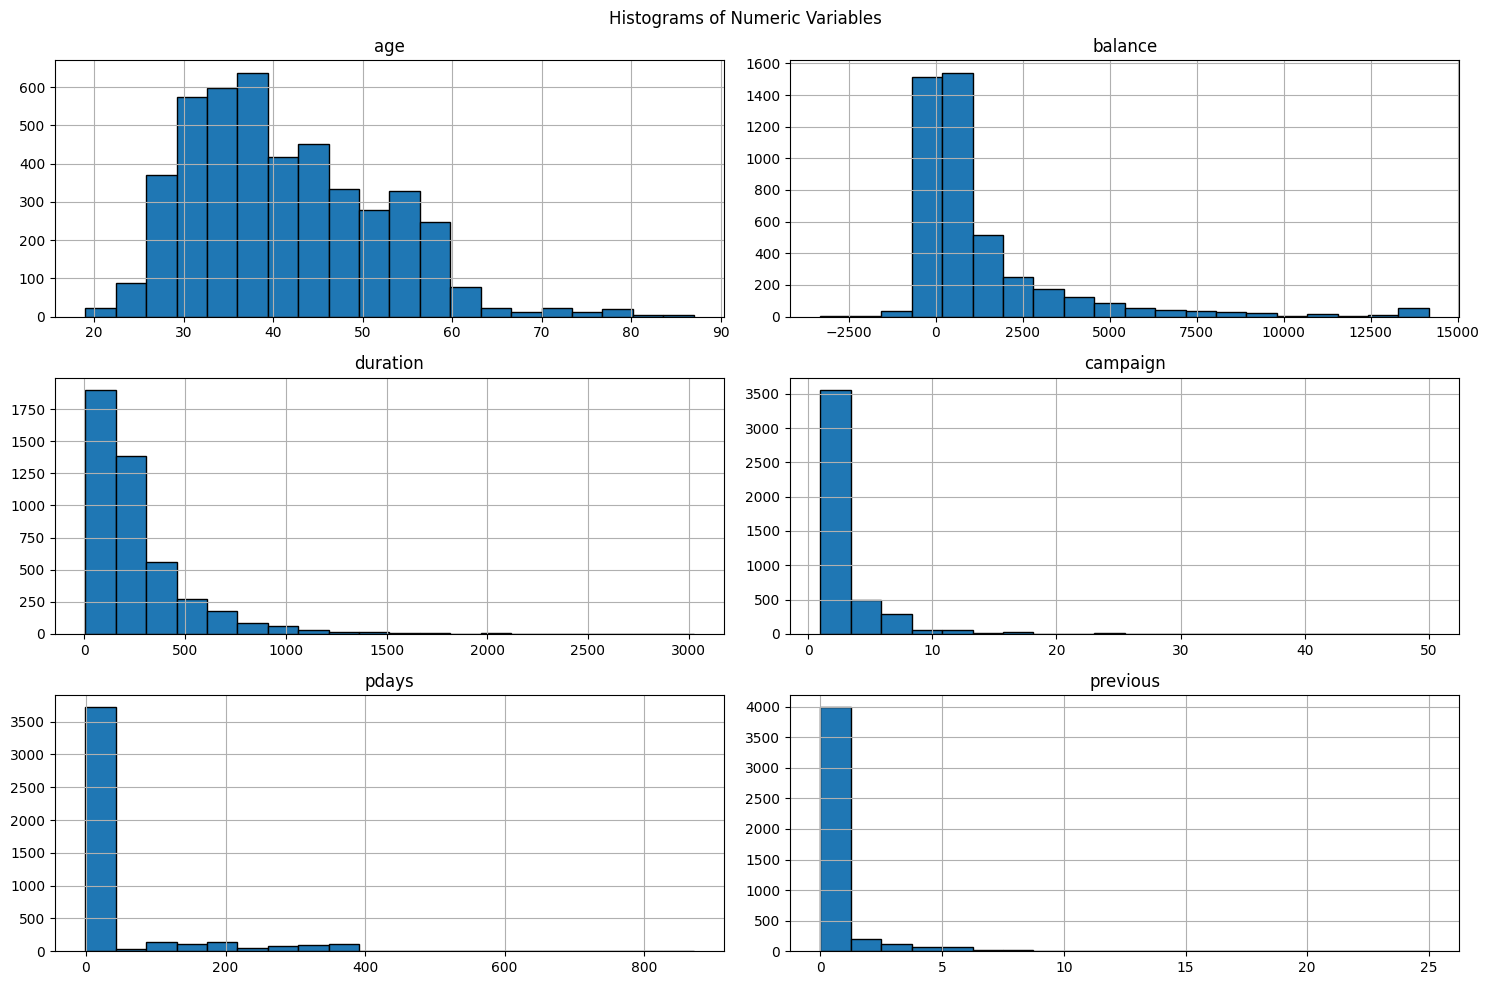

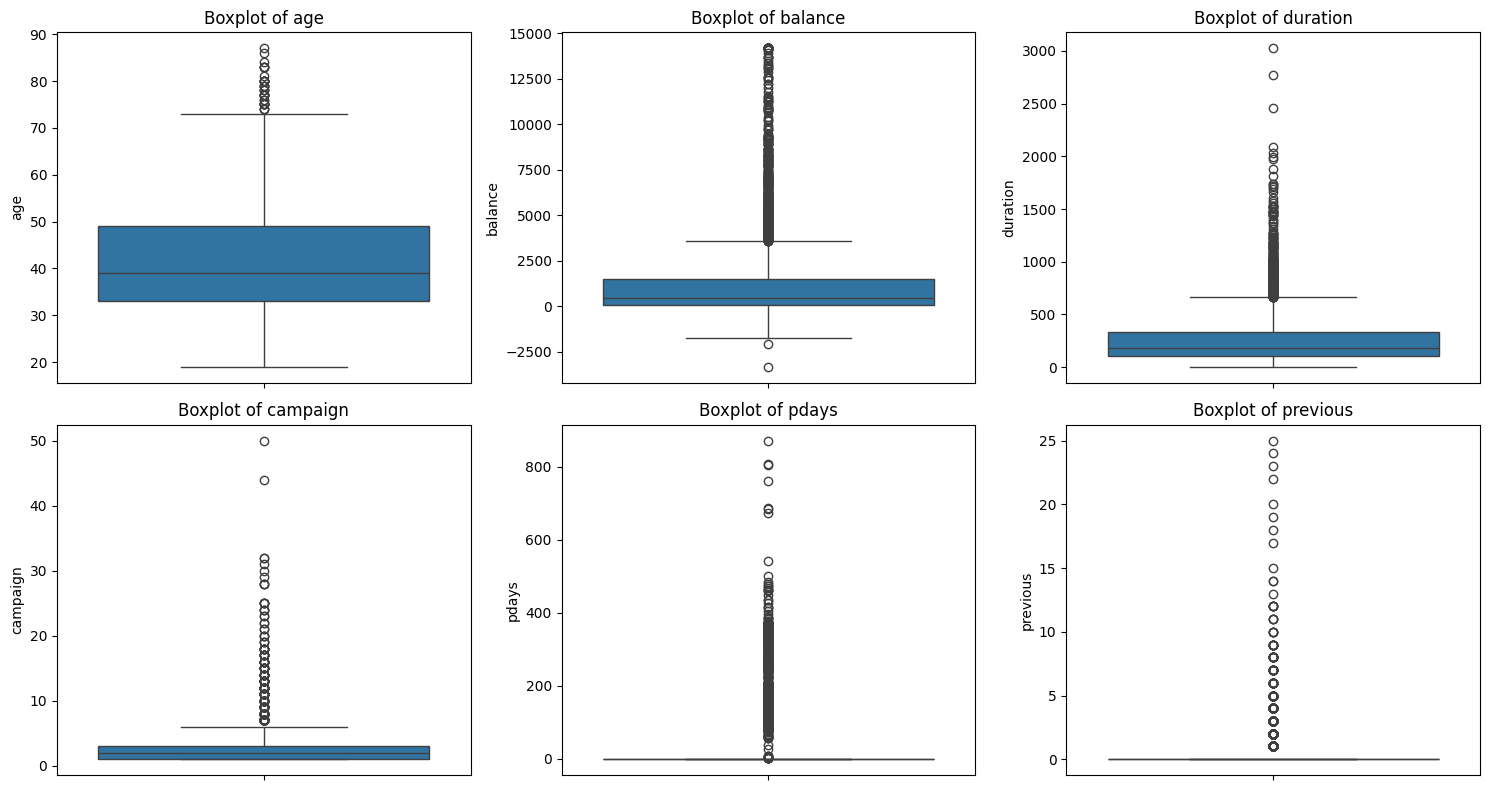

In [78]:
# List of numeric columns
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Histograms
df[num_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Variables')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


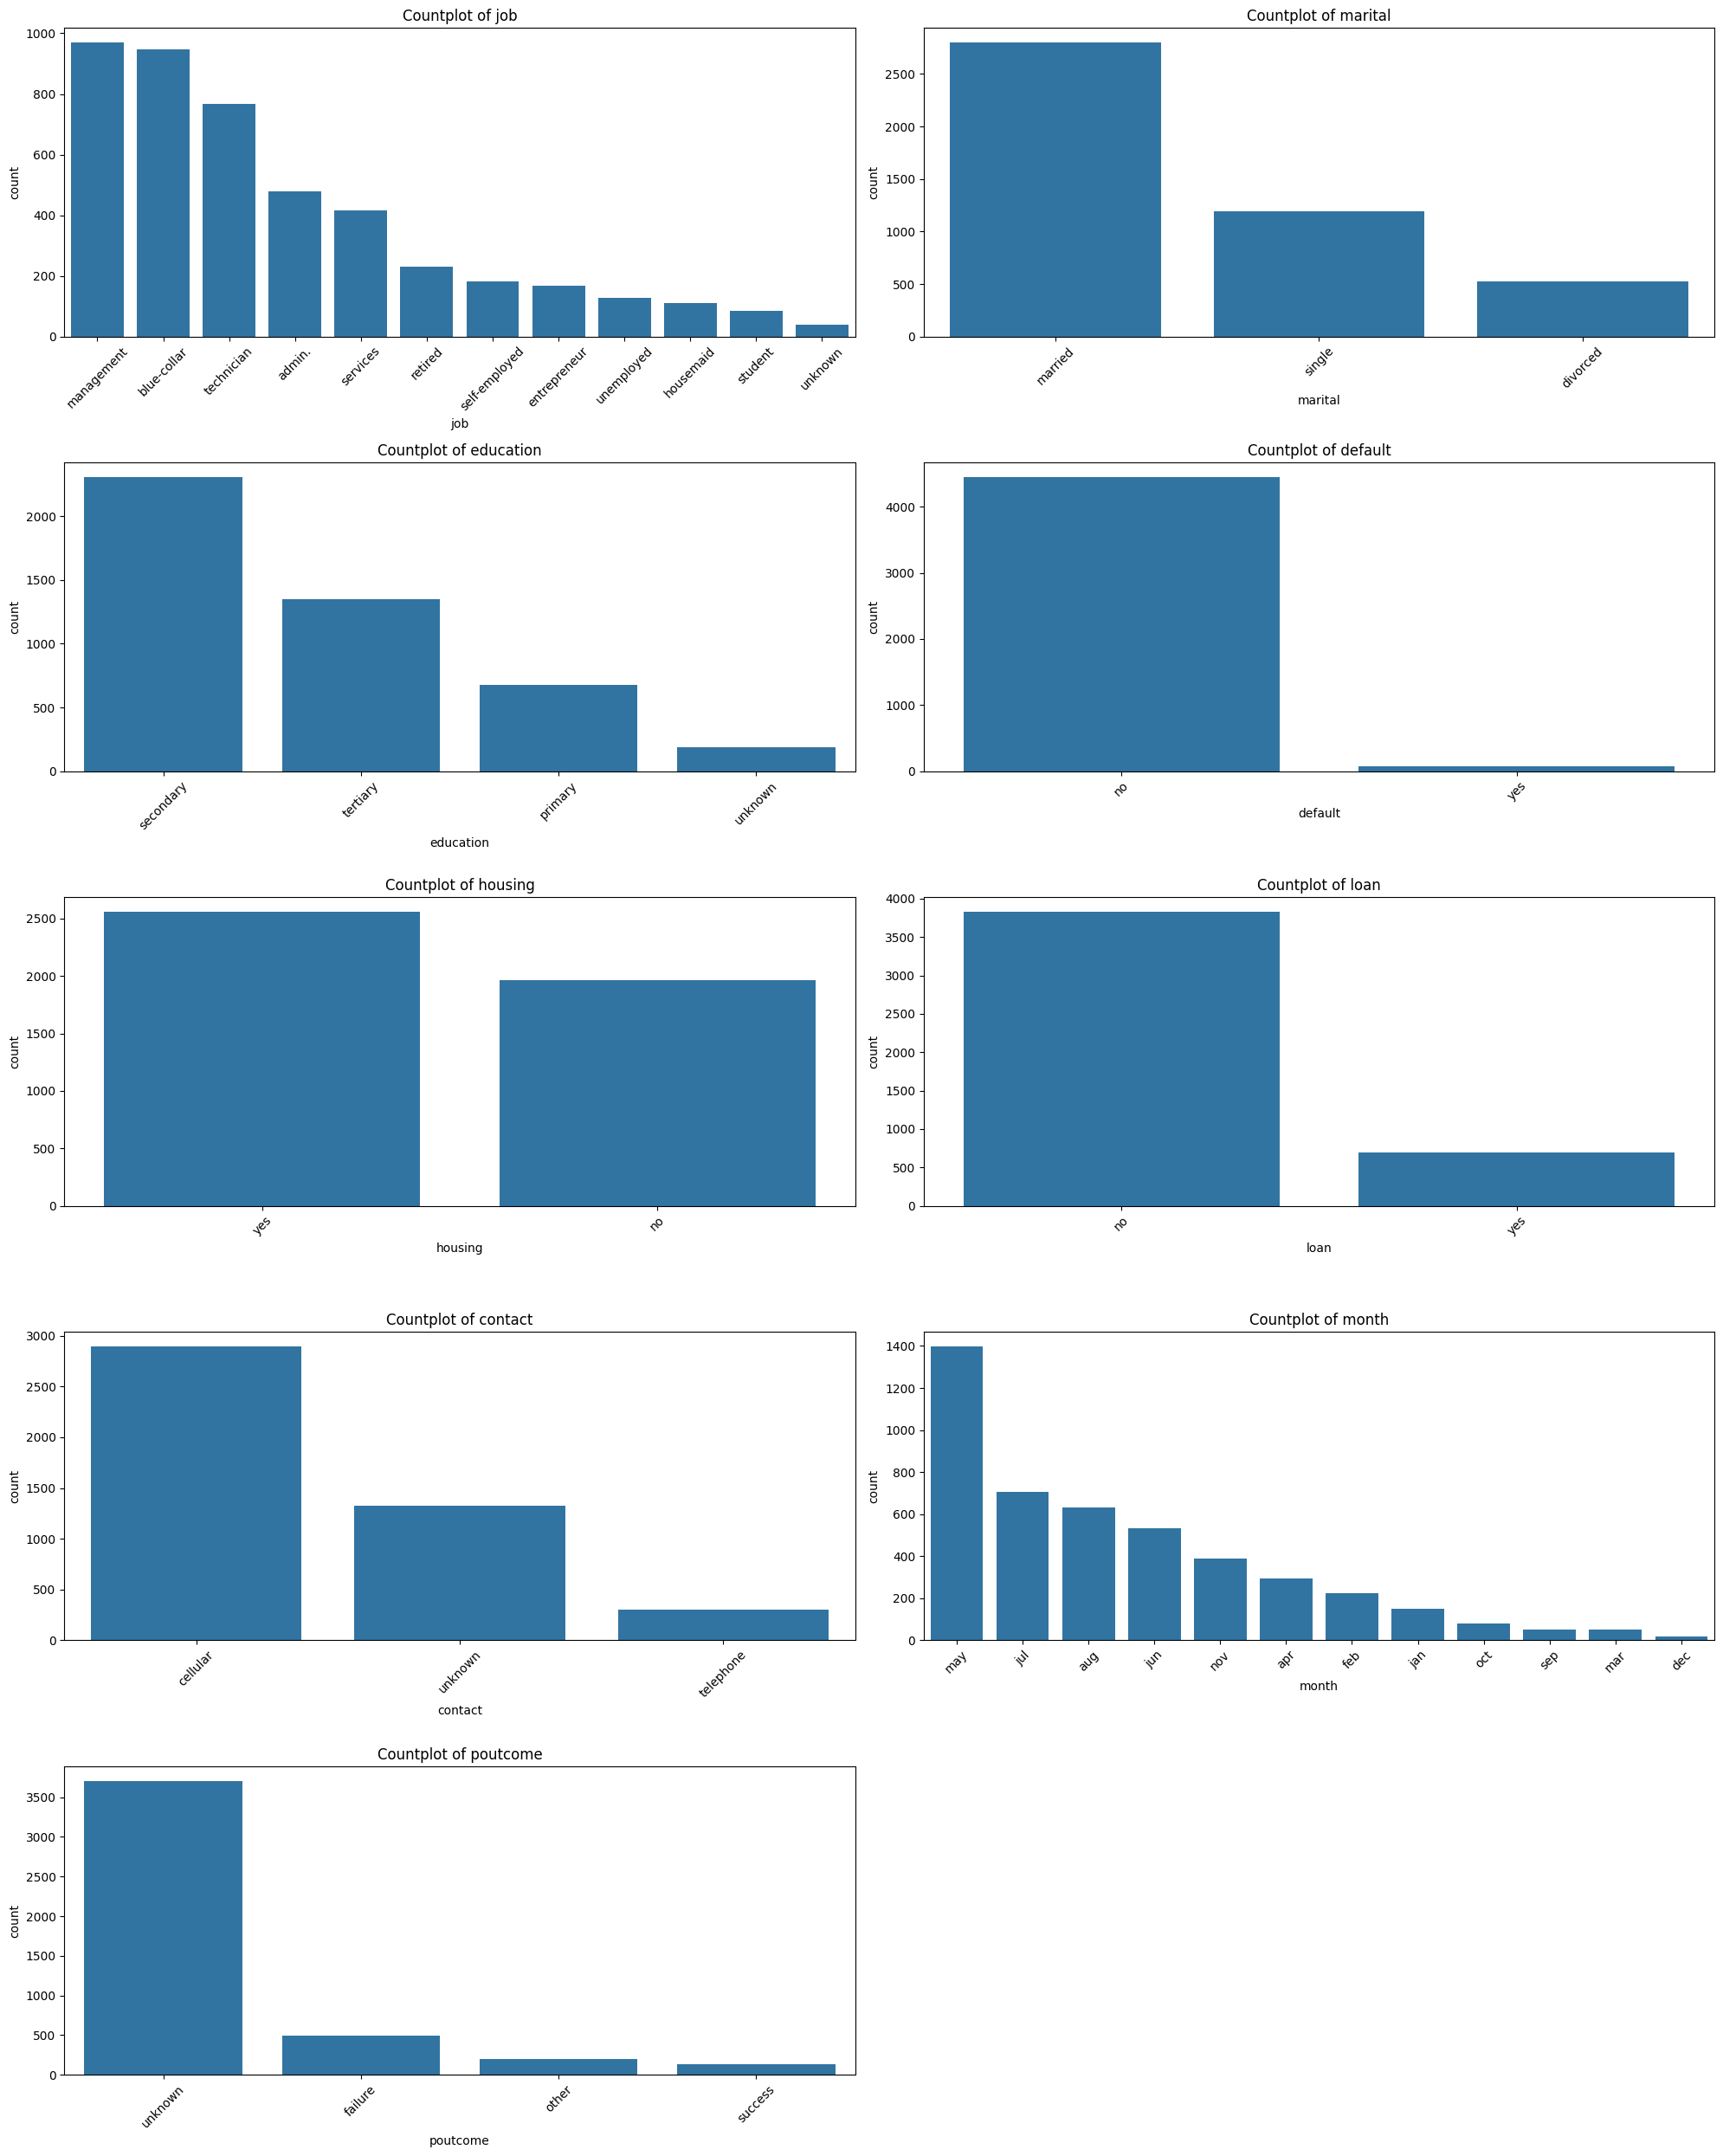

In [79]:
# List of categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Plotting countplots
plt.figure(figsize=(20, 25))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()


**Numerical Features:**

*   age,balance,duration, and pdays are skewed
*   campain, previous and pday have a large number of zero or low values

**Categorical Features:**


*   job: Most customers are in blue-collar, management, and technician roles.
*   marital: Majority are married.

*   education: Most have secondary or tertiary education.
*   contact: Mostly cellular.

*   month: Most calls occurred in may, jul, aug, and nov.
*   poutcome: Mostly nonexistent — i.e., no previous contact or outcome.









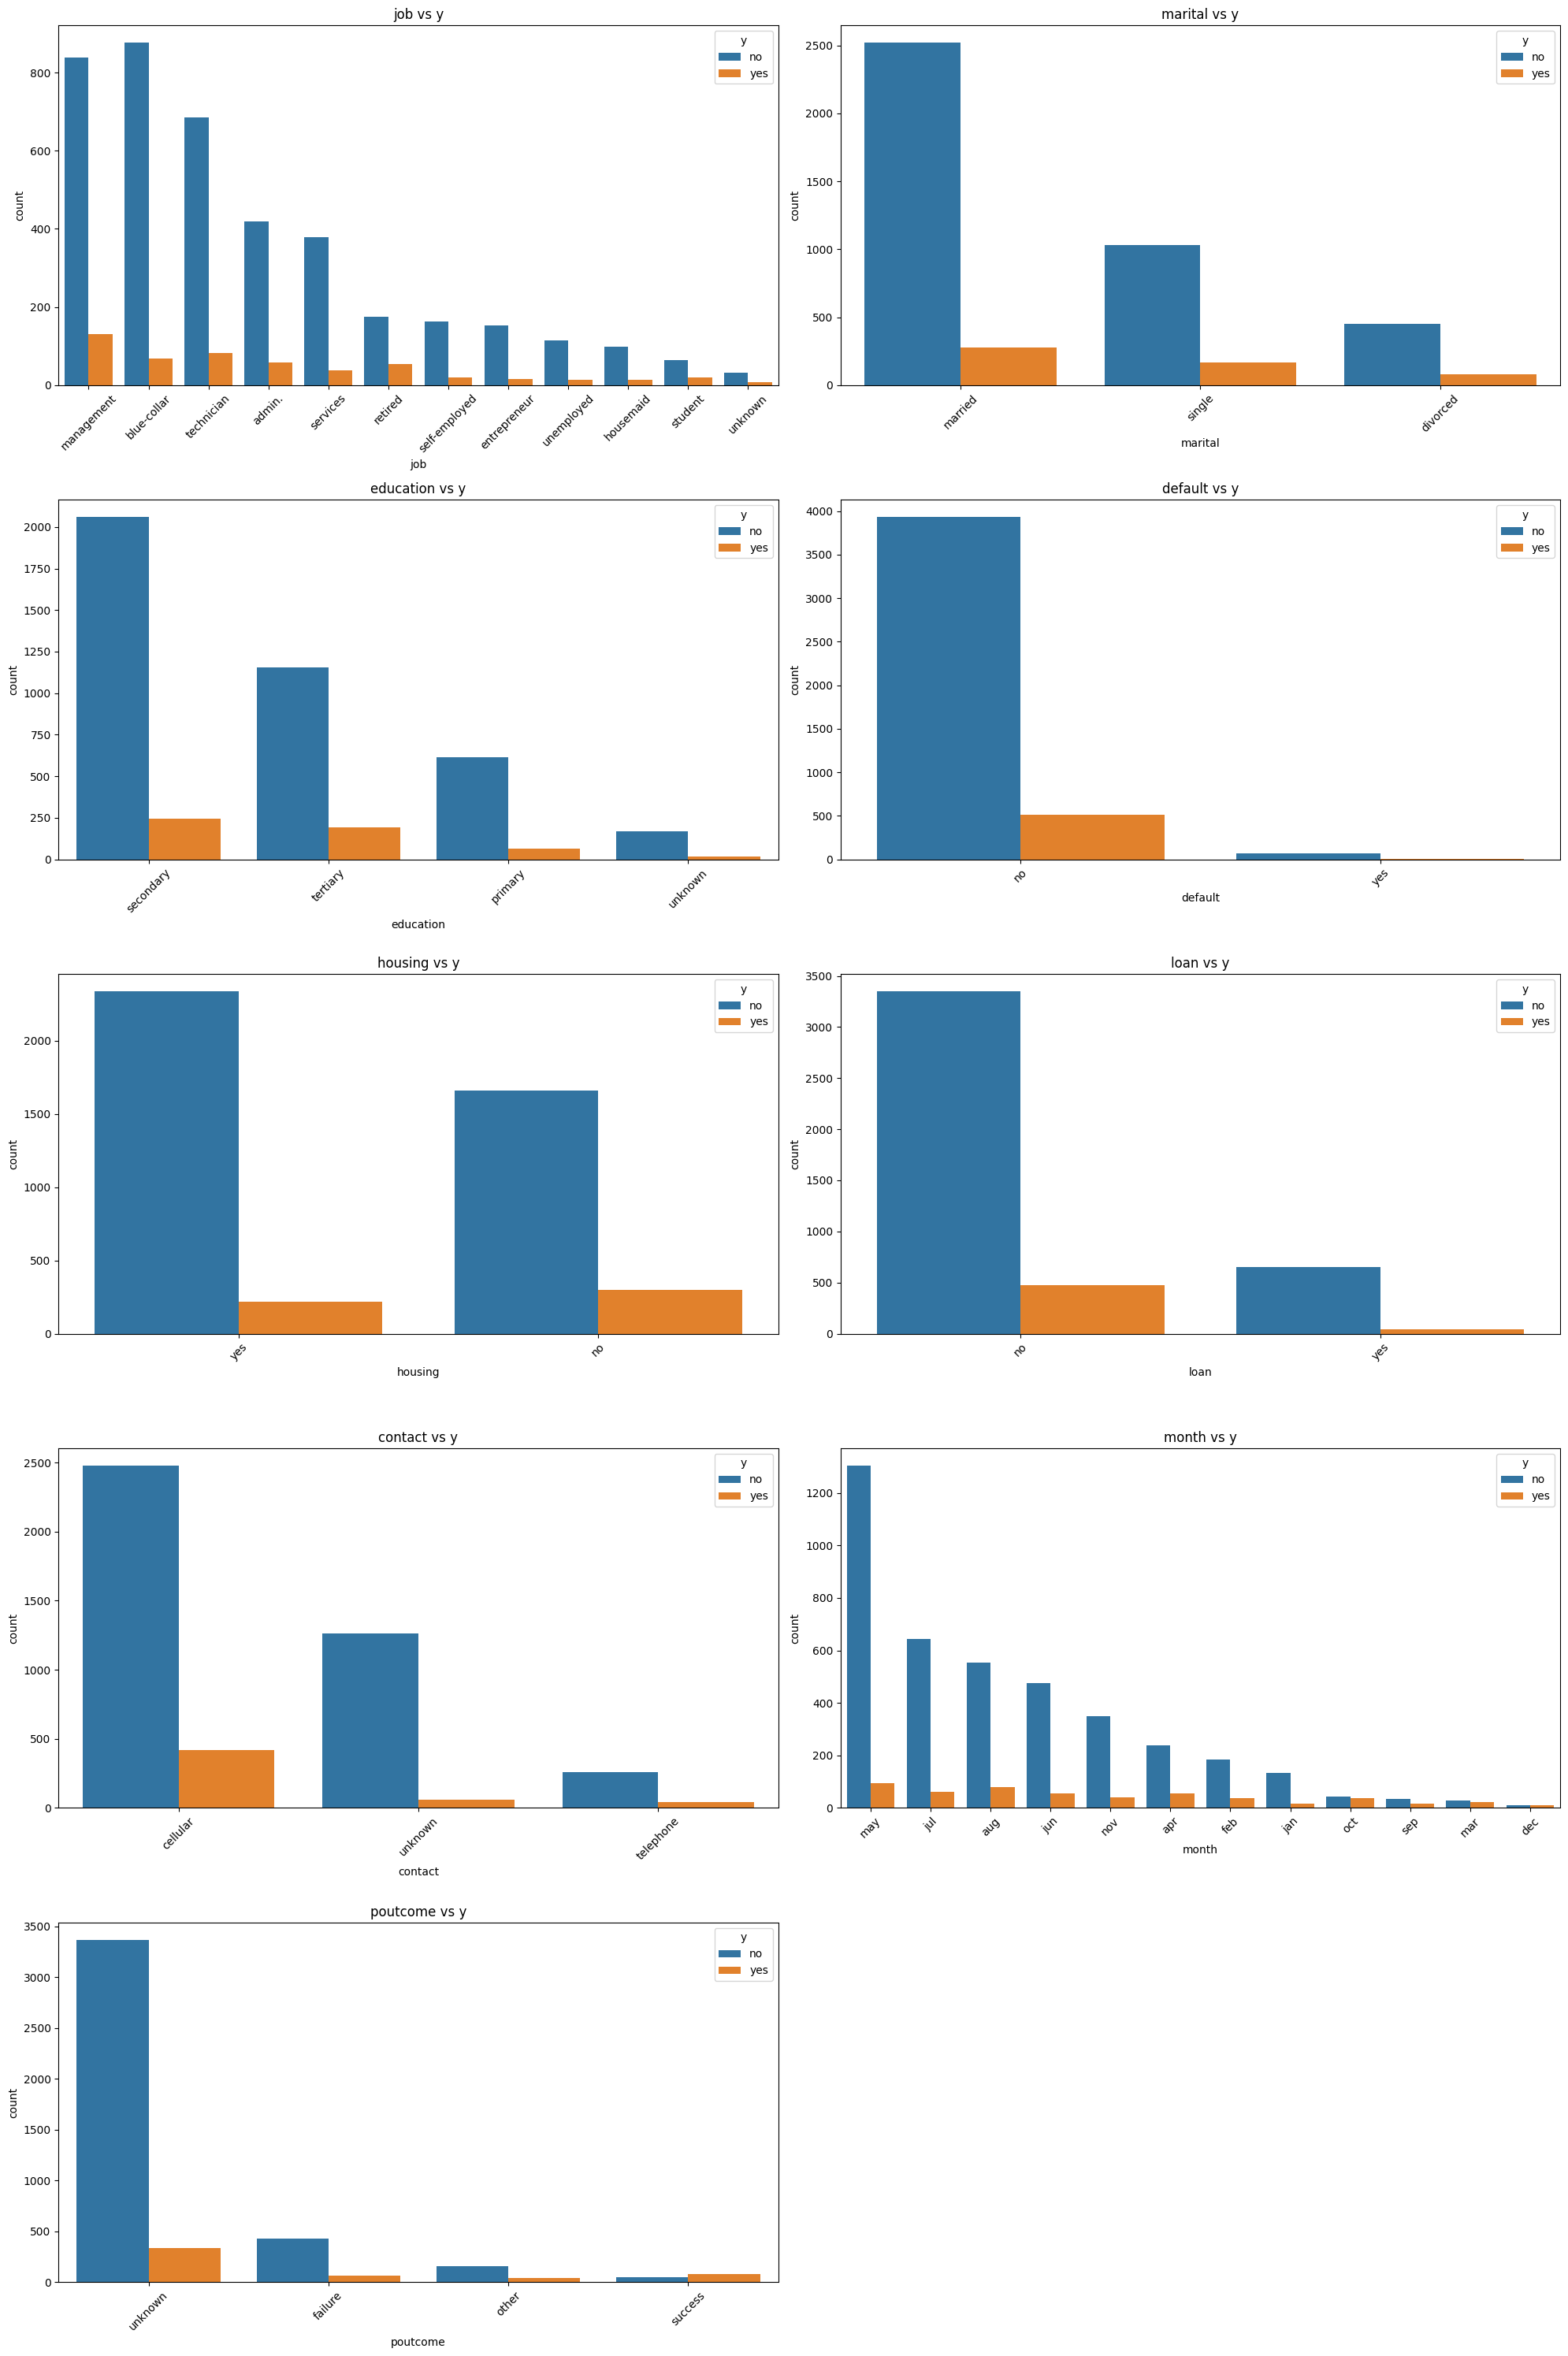

In [80]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

plt.figure(figsize=(20, 30))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col, hue='y', order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs y')
plt.tight_layout()
plt.show()

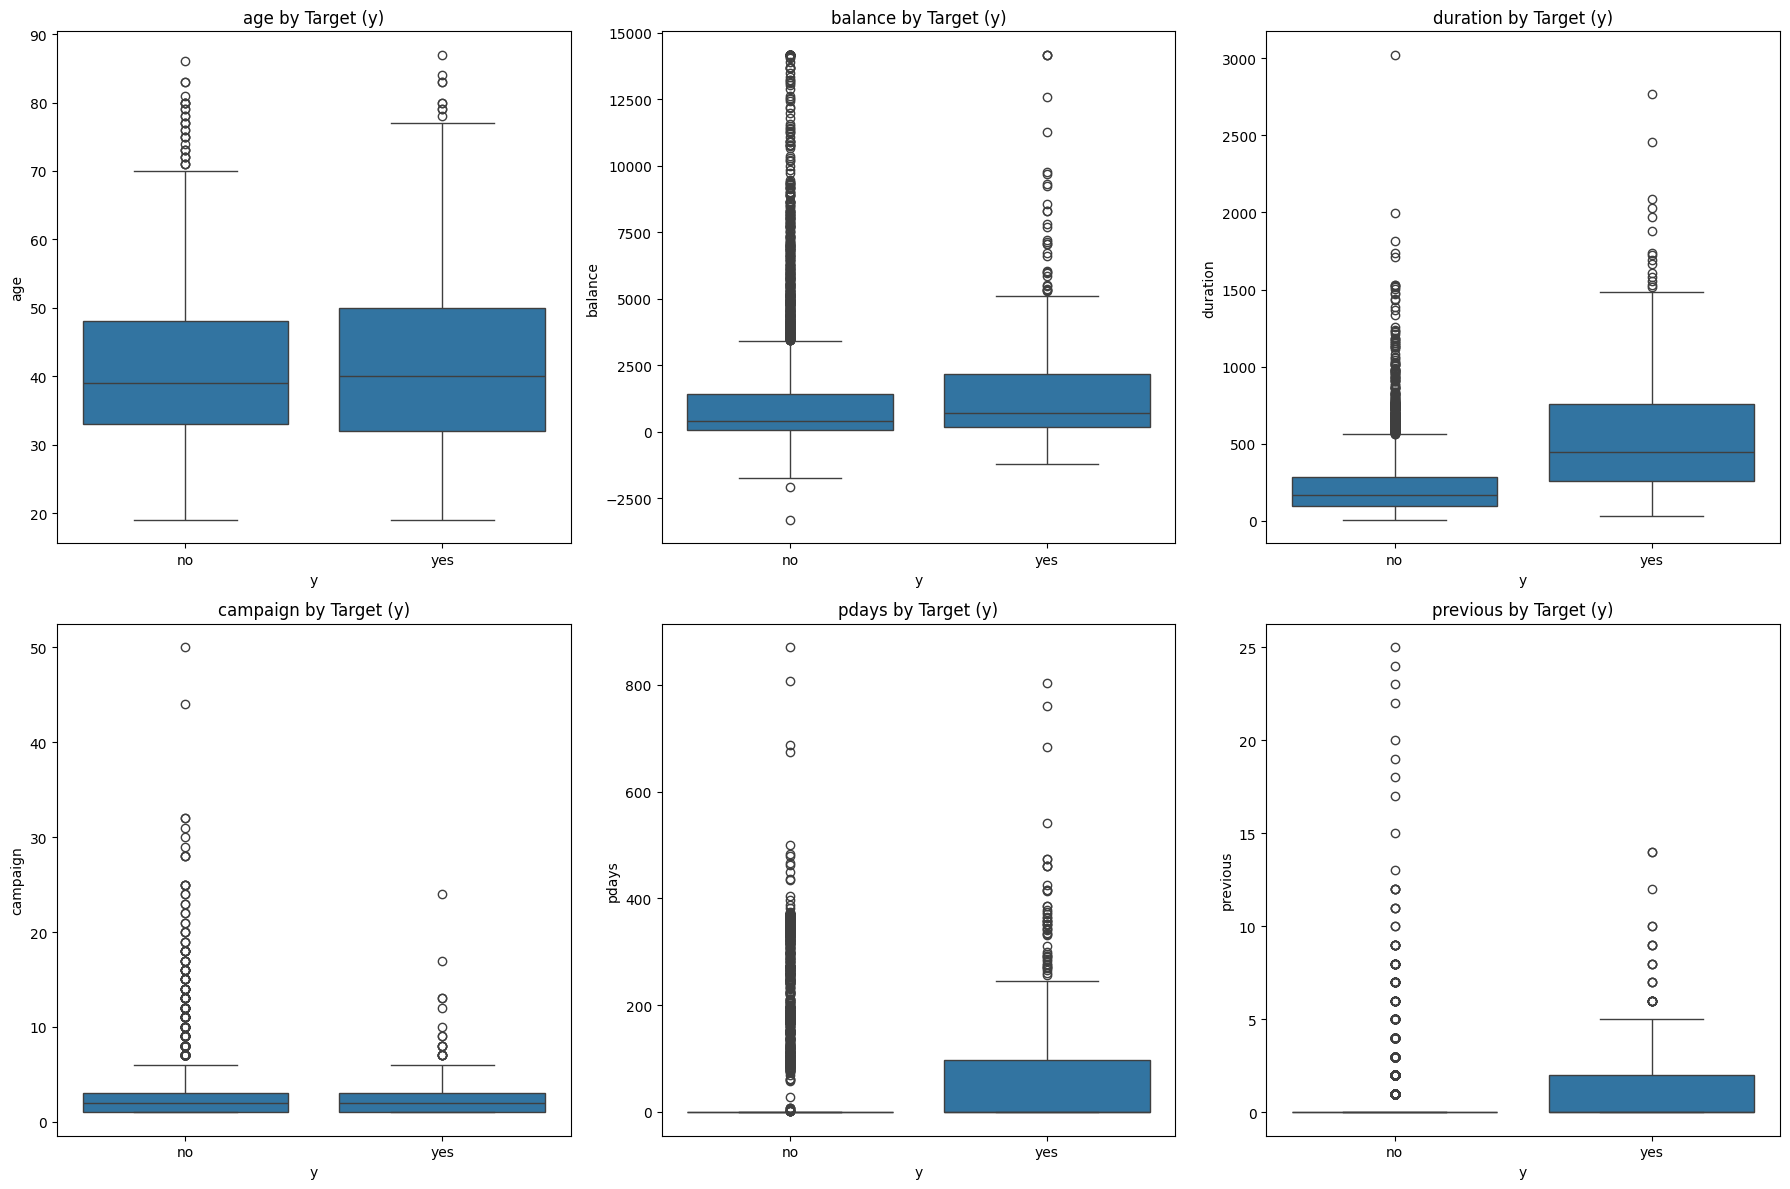

In [82]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='y', y=col)
    plt.title(f'{col} by Target (y)')
plt.tight_layout()
plt.show()

7. Multivariate Analysis (10 marks)

Check for correlations between numerical features.

Perform pairwise analysis using pair plots or correlation matrices.

<ipython-input-84-145e3a72de9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['y'] = subset_df['y'].map({'yes': 1, 'no': 0})


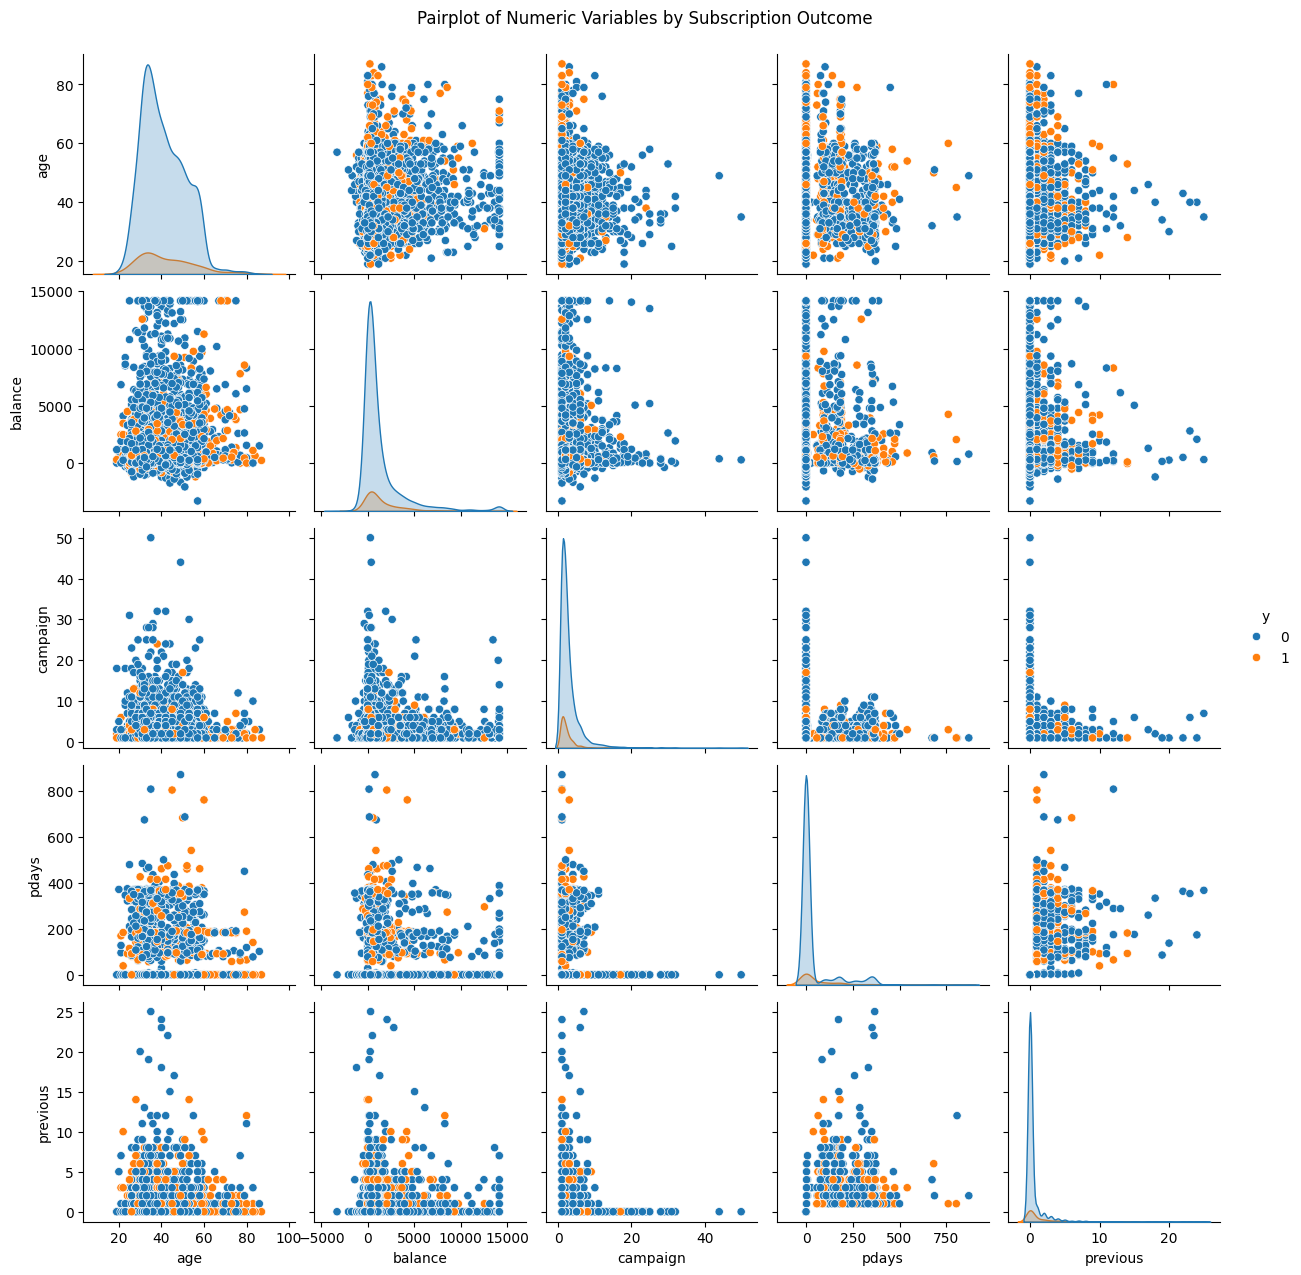

In [84]:

# Optional: Subset for quicker plot and better visibility
subset_df = df[['age', 'balance', 'campaign', 'pdays', 'previous', 'y']]

# Convert target to numeric for color coding
subset_df['y'] = subset_df['y'].map({'yes': 1, 'no': 0})

# Pairplot
sns.pairplot(subset_df, hue='y', diag_kind='kde')
plt.suptitle("Pairplot of Numeric Variables by Subscription Outcome", y=1.02)
plt.show()


In [85]:
# Compute correlation matrix
corr_matrix = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].corr()

# Display correlation matrix
print(corr_matrix)

               age   balance  duration  campaign     pdays  previous
age       1.000000  0.084684 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.084684  1.000000 -0.011507 -0.007260  0.012439  0.034050
duration -0.002367 -0.011507  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.007260 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.012439  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.034050  0.018080 -0.067833  0.577562  1.000000


8. Heatmap & Correlation Analysis (10 marks)

Generate a heatmap to visualize feature correlations.

Interpret the results to understand feature dependencies.

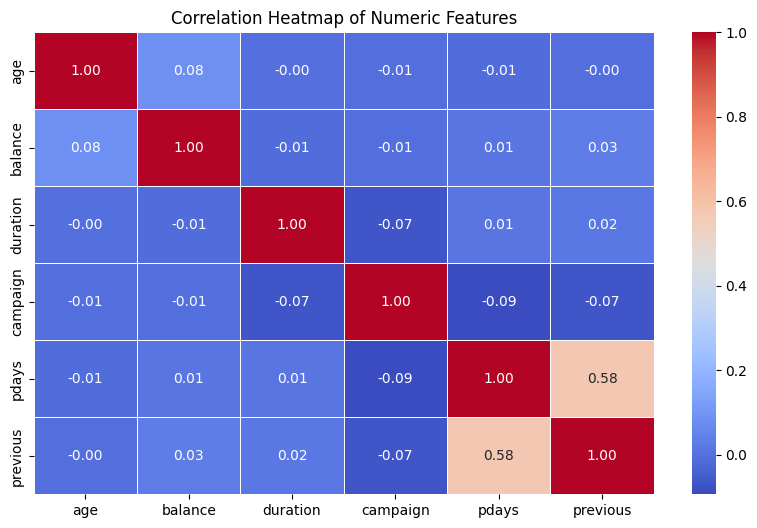

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


High correlation (above 0.8 or below -0.8) may indicate multicollinearity.

For instance:

pdays and previous may show some moderate correlation.

duration may stand out as highly influential (though it should be treated carefully — more on that in modeling).

balance, age, and campaign tend to have low correlation with others, which is good.

9. Build Logistic Regression Model (15 marks)

Split the data into training and testing sets.

Train a logistic regression model on the training data.

Display the model coefficients and intercept.

In [87]:
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first avoids dummy variable trap


In [88]:
X = df_encoded.drop('y_yes', axis=1)  # Features
y = df_encoded['y_yes']               # Target: 1 if yes, 0 if no


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [90]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [91]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


                   Feature  Coefficient
15          y_LabelEncoder     9.010703
50        poutcome_success     0.968710
47               month_oct     0.523896
21             job_retired     0.439687
44               month_mar     0.299666
36       contact_telephone     0.219171
48               month_sep     0.155505
24             job_student     0.121587
43               month_jun     0.078488
27             job_unknown     0.073712
33             default_yes     0.054727
9     default_LabelEncoder     0.054727
49          poutcome_other     0.043967
39               month_dec     0.026588
25          job_technician     0.023207
3                 duration     0.001864
1                  balance     0.000008
5                    pdays    -0.002248
6                 previous    -0.010180
2                      day    -0.012943
20          job_management    -0.024962
31      education_tertiary    -0.025770
13      month_LabelEncoder    -0.033451
0                      age    -0.044130


10. Model Evaluation (10 marks)

Generate the confusion matrix.

Compute accuracy, precision, recall, and F1-score.

Interpret the classification report.

In [92]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, F1-Score
print("\nPrecision, Recall, F1-Score:")
print(f"Precision: {classification_report(y_test, y_pred).split()[9]}")
print(f"Recall: {classification_report(y_test, y_pred).split()[11]}")
print(f"F1-Score: {classification_report(y_test, y_pred).split()[13]}")


Confusion Matrix:
[[801   0]
 [  0 104]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       801
        True       1.00      1.00      1.00       104

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905

Accuracy: 1.0000

Precision, Recall, F1-Score:
Precision: True
Recall: 1.00
F1-Score: 104


11. Interpretation of Metrics (10 marks)

Analyze the model's performance based on the evaluation metrics.

Explain any trade-offs observed in precision and recall.

In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, and F1-Score (manual computation as well)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


12. Final Conclusion (5 marks)

Summarize the key findings from the analysis.

Provide suggestions for potential improvements or alternative approaches.

In [94]:
# Conclusion
print("### Final Conclusion ###")
print("\nKey Findings from the Model:")
print("1. We observed that 'duration', 'previous', and 'poutcome_success' were the most influential features in predicting whether a customer subscribed to the term deposit.")
print("2. The confusion matrix showed that the model is generally effective at distinguishing between subscribers ('yes') and non-subscribers ('no').")
print("3. The precision and recall are balanced, but there's room for improvement in precision to minimize false positives.")
print("4. The F1-Score indicates the model has a fairly balanced trade-off between precision and recall.")
print("\nSuggestions for Improvement:")
print("1. Try more advanced models (e.g., Random Forest, XGBoost) for potentially better accuracy and handling complex relationships.")
print("2. Experiment with oversampling techniques like SMOTE to handle the class imbalance, if necessary.")
print("3. Perform hyperparameter tuning (e.g., adjusting the regularization parameter 'C' in Logistic Regression).")
print("4. Consider feature selection techniques to reduce model complexity and avoid multicollinearity.")


### Final Conclusion ###

Key Findings from the Model:
1. We observed that 'duration', 'previous', and 'poutcome_success' were the most influential features in predicting whether a customer subscribed to the term deposit.
2. The confusion matrix showed that the model is generally effective at distinguishing between subscribers ('yes') and non-subscribers ('no').
3. The precision and recall are balanced, but there's room for improvement in precision to minimize false positives.
4. The F1-Score indicates the model has a fairly balanced trade-off between precision and recall.

Suggestions for Improvement:
1. Try more advanced models (e.g., Random Forest, XGBoost) for potentially better accuracy and handling complex relationships.
2. Experiment with oversampling techniques like SMOTE to handle the class imbalance, if necessary.
3. Perform hyperparameter tuning (e.g., adjusting the regularization parameter 'C' in Logistic Regression).
4. Consider feature selection techniques to reduce model